In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, t

## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


mu: 5.027152443622421 sigma: 3.004774087810028


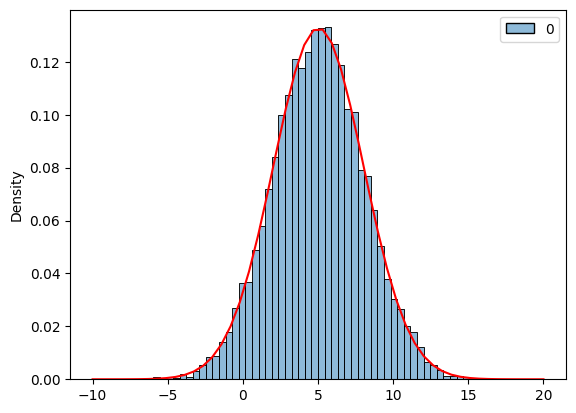

In [34]:
clean_data = np.load("clean_data.npy").T

N = clean_data.size

mu, sigma = norm.fit(clean_data)

print("mu:", mu, "sigma:", sigma)

x = np.linspace(-10, 20, 50)
y = norm.pdf(x, mu, sigma)

# Plot
sns.histplot(clean_data, bins=50, stat="density")
plt.plot(x, y, "r")

1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

mu: 6.614508398212064 sigma: 5.79757338228899


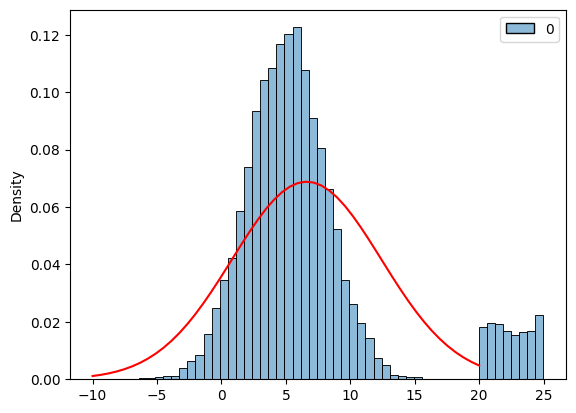

In [35]:
corrupted_data = np.load("corrupted_data.npy")

corrupted_mu, corrupted_sigma = norm.fit(corrupted_data)

print("mu:", corrupted_mu, "sigma:", corrupted_sigma)

x = np.linspace(-10, 20, 50)
y = norm.pdf(x, corrupted_mu, corrupted_sigma)

# Plot
sns.histplot(corrupted_data, bins=50, stat="density")
plt.plot(x, y, "r")

**Comments**: The corrupted data is mostly the same as the clean data, apart from some new values which appear on the right and appear to be non-normally distributed.
As a result $\mu$ has been skewed higher, and the variance ($\sigma$) has been increased. For this data, the MLE approach for fitting a Gaussian distribution is no longer suitable.

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

MLE: mu: 5.027152443622421 sigma: 3.004774087810028
Student-t: mu: 5.027154619707191 sigma: 3.002752906702013


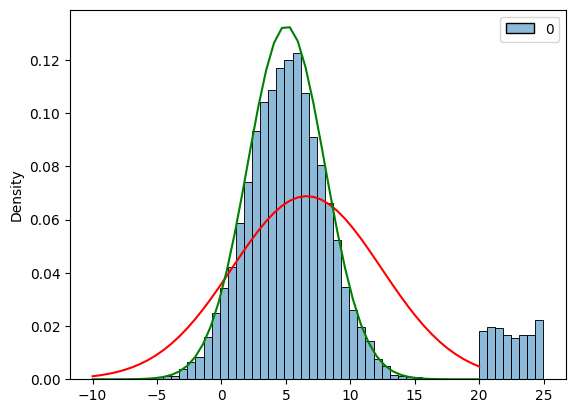

In [36]:
corrupted_data = np.load("corrupted_data.npy")

# Student's t-distribution
t_df, t_mu, t_scale = t.fit(clean_data)

print("MLE: mu:", mu, "sigma:", sigma)
print("Student-t: mu:", t_mu, "sigma:", t_scale)

t_x = np.linspace(-10, 20, 50)
t_y = t.pdf(t_x, t_df, t_mu, t_scale)


# Plot
sns.histplot(corrupted_data, bins=50, stat="density")
plt.plot(x, y, "r")
plt.plot(t_x, t_y, "g")

**Comment:** The mu and sigma values very closely resemble those of the original distribution.

**Explanation:** The student's t-distribution assigns more probability to extreme values than the standard normal distribution. It is therefore less affected when fitting to a set of data with extreme values.

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

In [37]:
samples = np.load("shape_array.npy")

samples.shape

samples.T[0].reshape(-1, 3)

array([[ 0.00186122, -0.00904643, -0.00114709],
       [ 0.00083296, -0.00911781, -0.00242058],
       [-0.00015244, -0.01013174, -0.00366987],
       ...,
       [-0.00323497, -0.0026268 , -0.02208414],
       [-0.00124768, -0.00156687, -0.02288372],
       [ 0.00016429, -0.00309086, -0.02162498]], dtype=float32)

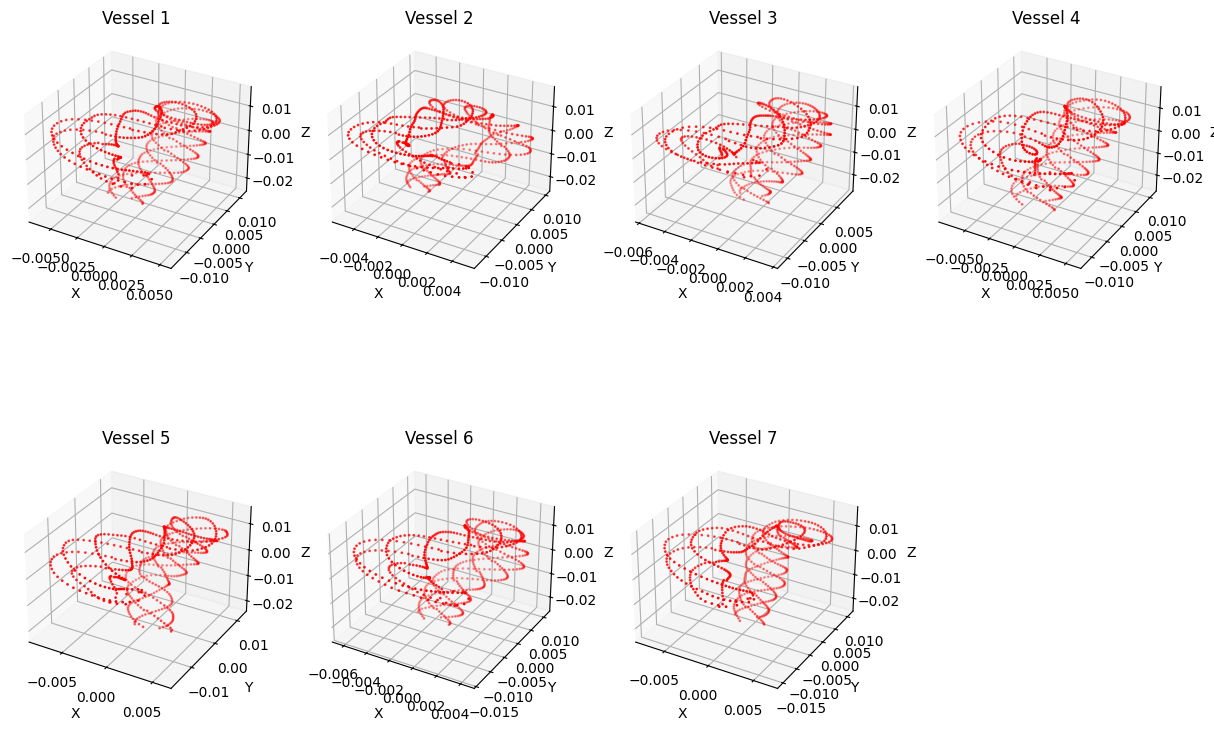

In [38]:
fig = plt.figure(figsize=(15, 10))

# Plot each vessel (assuming 'data' contains 7 vessels)
for i in range(7):
    vessel_data = samples.T[i].reshape(-1, 3)
    x, y, z = vessel_data[:, 0], vessel_data[:, 1], vessel_data[:, 2]

    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(x, y, z, s=1, c="r")  # Plot the 3D coordinates of the vessel

    ax.set_title(f"Vessel {i+1}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(samples.T)

# Eigenvectors
pca.components_

array([[-0.00414578, -0.05745343, -0.0357595 , ...,  0.03766388,
        -0.03702778,  0.03551193],
       [-0.01415549,  0.05170187, -0.05249313, ...,  0.01730633,
        -0.01251886, -0.03141249],
       [-0.00842157, -0.05345465, -0.01210265, ...,  0.00258985,
         0.04529303, -0.01588665]], dtype=float32)

In [40]:
# Eigenvalues
pca.explained_variance_

array([0.0011399 , 0.0003833 , 0.00014392], dtype=float32)

In [41]:
# Samples in new coordinate space compressed to 3 dimensions
pca_array = pca.transform(samples.T)

pca_array

array([[ 8.6586867e-03, -8.0314409e-03,  5.7005985e-03],
       [-4.7810216e-02, -2.4940854e-02, -2.0356174e-03],
       [-3.5227269e-02,  1.5263857e-02,  8.1075616e-03],
       [-3.4824510e-03,  3.3901393e-02, -1.2260921e-02],
       [ 4.8648726e-02, -1.2101829e-02, -1.0290949e-02],
       [-9.2794435e-05, -8.2150353e-03, -9.5576243e-03],
       [ 2.9305296e-02,  4.1239206e-03,  2.0336958e-02]], dtype=float32)

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [42]:
M = np.mean(samples.T, axis=0)

# Center the samples around 0
samples_standardised = (samples.T - M).T
cov = np.cov(samples_standardised)

values, vectors = np.linalg.eig(cov)

components = vectors[:, :3].real

In [43]:
# Eigenvectors
components.T

array([[-0.00414575, -0.05745342, -0.03575949, ...,  0.03766389,
        -0.03702776,  0.03551194],
       [ 0.01415531, -0.05170191,  0.05249314, ..., -0.01730633,
         0.01251889,  0.03141248],
       [ 0.00842173,  0.05345449,  0.01210254, ..., -0.00258992,
        -0.04529304,  0.01588665]])

In [44]:
samples_standardised

array([[-7.4758893e-05,  1.1881958e-03, -1.5242831e-03, ...,
        -7.2688295e-04,  3.6488986e-04,  4.1148486e-04],
       [-1.4068587e-03,  1.4783959e-03,  3.0308613e-03, ...,
        -2.3050755e-03, -3.0800793e-04, -2.8335806e-03],
       [-2.2647216e-04,  2.8674894e-03,  7.6742750e-04, ...,
        -7.8169454e-04,  7.2224683e-04, -1.5874696e-03],
       ...,
       [-5.2719354e-04, -2.1733197e-03, -1.3619580e-04, ...,
         2.5318917e-03, -8.2525064e-04,  1.0413480e-03],
       [-6.4024120e-04,  2.0622027e-03,  1.7977811e-03, ...,
        -1.7871442e-03, -3.4645502e-04, -8.0838334e-05],
       [ 7.2636455e-04, -7.2009303e-04, -1.6911328e-03, ...,
         2.6638750e-03, -3.9904937e-04,  3.3359230e-04]], dtype=float32)

In [45]:
eig_array = np.matmul(samples_standardised.T, components)

eig_array

array([[ 8.65868278e-03,  8.03143855e-03, -5.70059139e-03],
       [-4.78102045e-02,  2.49408721e-02,  2.03563476e-03],
       [-3.52272572e-02, -1.52638448e-02, -8.10759034e-03],
       [-3.48245763e-03, -3.39013944e-02,  1.22609331e-02],
       [ 4.86487354e-02,  1.21018169e-02,  1.02909283e-02],
       [-9.27925616e-05,  8.21503214e-03,  9.55762714e-03],
       [ 2.93052925e-02, -4.12392512e-03, -2.03369421e-02]])

In [46]:
pca_array

array([[ 8.6586867e-03, -8.0314409e-03,  5.7005985e-03],
       [-4.7810216e-02, -2.4940854e-02, -2.0356174e-03],
       [-3.5227269e-02,  1.5263857e-02,  8.1075616e-03],
       [-3.4824510e-03,  3.3901393e-02, -1.2260921e-02],
       [ 4.8648726e-02, -1.2101829e-02, -1.0290949e-02],
       [-9.2794435e-05, -8.2150353e-03, -9.5576243e-03],
       [ 2.9305296e-02,  4.1239206e-03,  2.0336958e-02]], dtype=float32)

**Comment:** There appears to be no difference in the coordinates other than the sign.

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

In [47]:
# Perform the inverse of the previous step and uncenter the data using the mean matrix
reconstructed = np.matmul(eig_array, np.linalg.pinv(components)) + M

Eigendecomposition:
[[ 0.00196576 -0.00885701 -0.00087765]
 [ 0.00097108 -0.00912948 -0.00200501]
 [ 0.00011874 -0.0100544  -0.00296874]
 ...
 [-0.00225246 -0.00190516 -0.02234322]
 [-0.00035386 -0.00081245 -0.02281984]
 [ 0.00089337 -0.00241249 -0.02188213]]

PCA Vessel:
[[ 0.00196576 -0.00885701 -0.00087765]
 [ 0.00097108 -0.00912948 -0.00200501]
 [ 0.00011874 -0.0100544  -0.00296874]
 ...
 [-0.00225246 -0.00190516 -0.02234322]
 [-0.00035386 -0.00081245 -0.02281984]
 [ 0.00089337 -0.00241249 -0.02188213]]



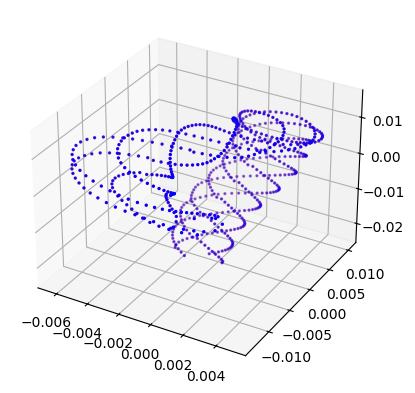

In [48]:
fig = plt.figure()

ax = fig.add_subplot(projection="3d")

# Reshaping in this way 'unstacks' the coordinates so they can be plotted in matplotlib
reconstructed_vessel = reconstructed[0].T.reshape(-1, 3)
print("Eigendecomposition:")
print(reconstructed_vessel)
print()
x, y, z = (
    reconstructed_vessel[:, 0],
    reconstructed_vessel[:, 1],
    reconstructed_vessel[:, 2],
)
ax.scatter(x, y, z, s=1, c="r")  # Plot the 3D coordinates of the vessel

reconstructed_vessel = pca.inverse_transform(pca_array)[0].T.reshape(-1, 3)
print("PCA Vessel:")
print(reconstructed_vessel)
print()
x, y, z = (
    reconstructed_vessel[:, 0],
    reconstructed_vessel[:, 1],
    reconstructed_vessel[:, 2],
)
ax.scatter(x, y, z, s=2, c="b")  # Plot the 3D coordinates of the vessel

**Comment:** The reconstructed vessels from eigendecomposition and PCA are plotted in red and blue respectively. They are almost identical, hence they appear as purple in the plot.

**Answer**: PCA is often described as an approach for data compression because it can compress large numbers of dimensions down to just a few whilst still retaining the information. As shown in this exercise, it is possible to retain almost all of the original information using just a few principal components.

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [49]:
import os
import pandas as pd

root_dir = os.getcwd() + "/"

## Define paths to the training data and targets files
training_data_path = root_dir + "Training_data.csv"
training_targets_path = root_dir + "Training_data_targets.csv"

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

In [50]:
# Join the two CSVs in one DataFrame
df_features = pd.read_csv(training_data_path)
df_target = pd.read_csv(training_targets_path)

df = pd.concat([df_features, df_target], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [51]:
# Remove columns with large numbers of missing values
df.drop(["PctSomeCol18_24", "PctPrivateCoverageAlone"], axis=1, inplace=True)

### Unusual Values

- `PctSomeCol18_24` has mostly null values, so it is excluded.
- `PctPrivateCoverageAlone` is also excluded, as it has a large number of missing values.
- `PctEmployed16_Over` has 119 missing values which should be imputed with median values.

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>],
       [<Axes: title={'center': 'povertyPercent'}>,
        <Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>],
       [<Axes: title={'center': 'AvgHouseholdSize'}>,
        <Axes: title={'center': 'PercentMarried'}>,
        <Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>],
       [<Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>,
        <Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'center': 'PctUnemployed16_Over'}>,
        <Axes: title

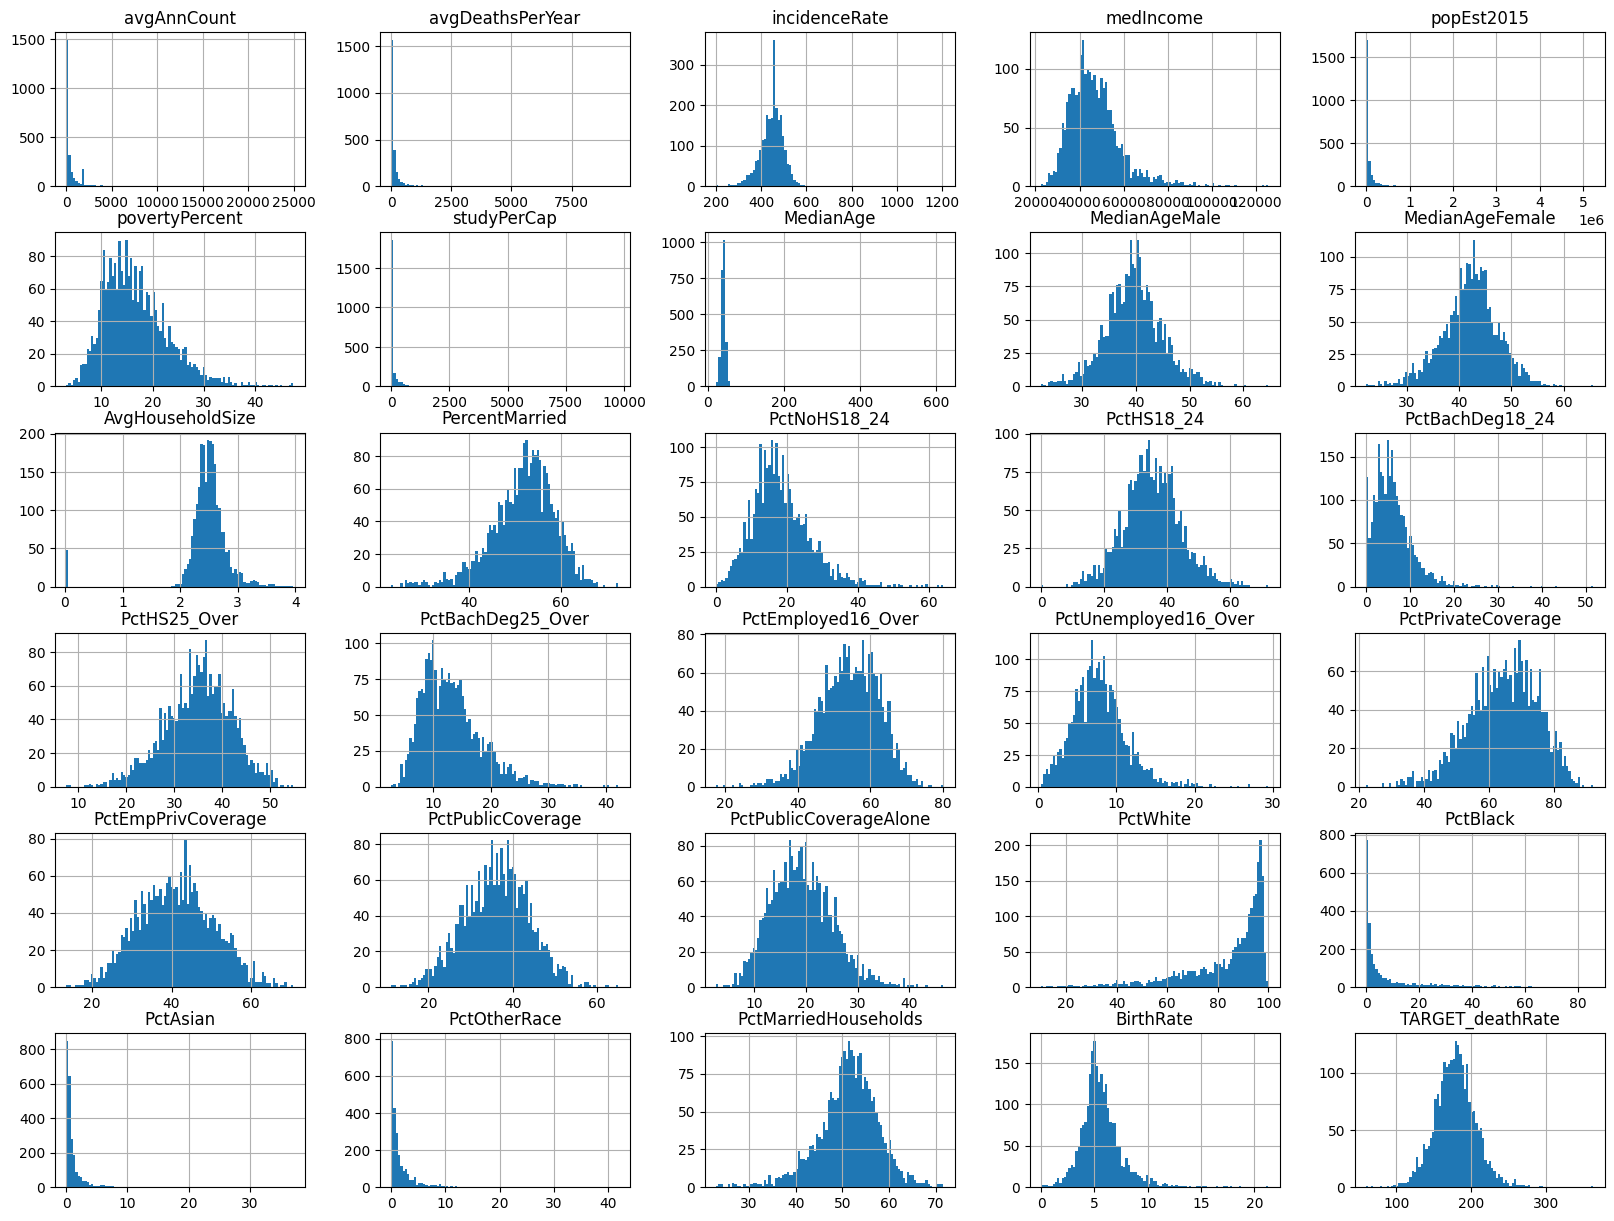

In [52]:
df.hist(bins=100, figsize=(20, 15))

In [53]:
# Remove rows with the extreme median age values
df = df[df["MedianAge"] < 100]

# Split the dataframes up again
df_features = df.drop(["TARGET_deathRate"], axis=1)
df_target = df[["TARGET_deathRate"]]


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

In [54]:
corr = df.corrwith(df["TARGET_deathRate"])

# Use np.abs as a key to sort my the magnitude
corr.sort_values(ascending=False, key=np.abs).head(n=6)

TARGET_deathRate          1.000000
PctBachDeg25_Over        -0.490871
incidenceRate             0.442390
PctPublicCoverageAlone    0.438433
medIncome                -0.414882
povertyPercent            0.412435
dtype: float64

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


array([[<Axes: xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<Axes: xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <Axes: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <Axes: xlabel='medIncome', ylabel='incidenceRate'>,
        <Axes: xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<Axes: xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='medIncome', ylabel='PctPublicCoverageAlone'>,
        <Axes: xl

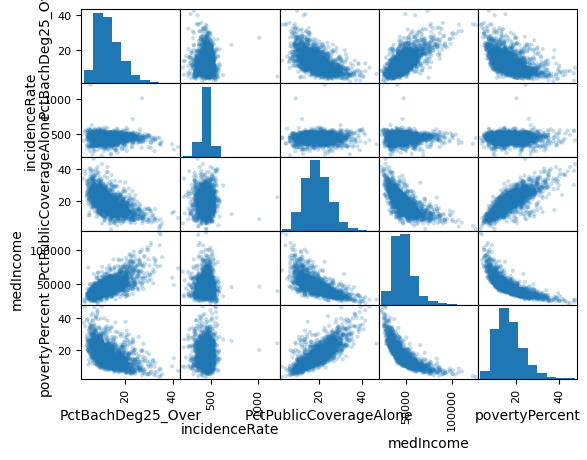

In [55]:
pd.plotting.scatter_matrix(
    df[
        [
            "PctBachDeg25_Over",
            "incidenceRate",
            "PctPublicCoverageAlone",
            "medIncome",
            "povertyPercent",
        ]
    ],
    alpha=0.25,
    diagonal="hist",
)

*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="median")), ("std_scaler", StandardScaler())]
)

features_tr = pipeline.fit_transform(df_features)

print(features_tr.shape)
print(df_target.shape)

# Preview results
pd.DataFrame(features_tr, columns=df_features.columns).head()

(2412, 29)
(2412, 1)


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.417692,-0.335978,-0.790064,-1.105163,-0.320373,0.575085,-0.291867,1.989807,2.121074,1.819184,...,-0.663872,-1.615401,1.749619,0.234983,0.794378,-0.594803,-0.448866,-0.484852,0.095709,-0.298938
1,-0.375177,-0.311982,-0.799157,0.024321,-0.270705,-0.479054,-0.291867,-0.009164,0.038316,0.099506,...,1.024829,0.594033,-0.601329,-1.033018,0.526647,-0.479152,-0.245335,-0.314653,-0.053674,0.349599
2,-0.437790,-0.377425,-1.741108,2.543385,-0.314708,-1.580394,-0.291867,-0.523185,-0.510775,-0.442567,...,1.110213,1.390704,-2.341809,-1.767124,0.733761,-0.625245,-0.278479,-0.527987,2.023822,-0.245225
3,-0.266958,-0.183278,-0.330000,2.832590,-0.180651,-1.470260,-0.291867,0.504857,0.587407,0.361196,...,1.508670,1.528794,-0.965011,-0.949597,0.362633,-0.110621,-0.144595,-0.434856,1.689211,-0.003912
4,-0.405324,-0.331615,-0.731874,-0.357348,-0.272242,-0.353187,-0.291867,-1.855832,-1.779364,-1.975324,...,-0.474130,0.562166,-1.224785,-0.182122,-0.248590,-0.420387,2.796685,1.020005,1.790385,2.417107


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.333, random_state=42
)

X_train_tr = pipeline.transform(X_train)
X_test_tr = pipeline.transform(X_test)

##### OLS

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_tr, y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def evaluate_cv(estimator, X, y):
    scores = cross_val_score(estimator, X, y, cv=10, scoring="neg_mean_squared_error")
    print(scores)
    print("MSE:", scores.mean())

In [60]:
evaluate_cv(lin_reg, X_test_tr, y_test)

[-297.05716855 -260.75037165 -548.34294562 -448.97203919 -553.9596186
 -396.03403171 -260.6816536  -386.74673065 -334.10241842 -327.50554755]
MSE: -381.41525255366145


#### Lasso

Regularisation weights are found by using the LassoCV class, which uses cross-validation to optimise the alpha parameter.

In [61]:
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV(cv=10)
lasso_reg.fit(X_train_tr, y_train.values.ravel())

evaluate_cv(lasso_reg, X_test_tr, y_test.values.ravel())

[-334.82088445 -295.71796273 -528.18644989 -460.92883774 -569.56228723
 -412.30846358 -246.64485424 -373.42170201 -311.8867034  -318.17390389]
MSE: -385.16520491746576


#### Ridge

Similar to the Lasso regression, the RidgeCV class is used to optimise the regularisation weights.

In [62]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(cv=10)
ridge_reg.fit(X_train_tr, y_train.values.ravel())

evaluate_cv(ridge_reg, X_test_tr, y_test.values.ravel())

[-296.34552729 -266.12530314 -533.79798617 -453.31796595 -563.74635032
 -403.3405836  -243.44487463 -375.81054902 -312.88407782 -324.88172403]
MSE: -377.36949419700204


**Comment:** The Ridge regression shows the best cross-validation scores

### Overall Performance

Scores for ridge regression on the full test set

In [63]:
pred = ridge_reg.predict(X_test_tr)

r2 = ridge_reg.score(X_test_tr, y_test.values.ravel())
mse = mean_squared_error(y_test.values.ravel(), pred)
rmse = np.sqrt(mse)

print("r2:", r2)
print("mse:", mse)
print("rmse:", rmse)

r2: 0.4988560433147583
mse: 370.3277325230142
rmse: 19.24390117733445


In [64]:
comparison = y_test.copy()
comparison["Prediction"] = pred
comparison["Error"] = comparison["TARGET_deathRate"] - comparison["Prediction"]

comparison

,TARGET_deathRate,Prediction,Error
1640,169.9,163.620623,6.279377
2224,195.2,195.169122,0.030878
2425,162.8,173.777100,-10.977100
1973,136.8,165.439154,-28.639154
1818,179.7,182.110685,-2.410685
...,...,...,...
1511,174.0,187.525485,-13.525485
755,151.5,151.907113,-0.407113
1618,205.4,194.971521,10.428479
1237,155.2,167.043021,-11.843021
